# GRIP-APRIL21 @The Sparks Foundation

# TASK 1 : PREDICTION USING SUPERVISIED ML

# Author: Vishal Soni

DATA SCIENCE AND BUSINESS ANALYTICS. 
Task- OBJECTIVE: PREDICT THE PERCENTAGE OF AN STUDENT BASED ON THE NUMBER OF STUDY HOURS GIVEN THAT , TO SHOW WHAT WILL BE THE PREDICTED SCORE IF A STUDENT STUDIES FOR 9.25 HRS/DAY?

# Step-1 Reading the Given Data Set

In [1]:
# Reading The CSV Data

student_data <- read.csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv", header = TRUE)
head(student_data)

,Hours,Scores
,<dbl>,<int>
1,2.5,21
2,5.1,47
3,3.2,27
4,8.5,75
5,3.5,30
6,1.5,20


In [2]:
summary(student_data)

     Hours           Scores     
 Min.   :1.100   Min.   :17.00  
 1st Qu.:2.700   1st Qu.:30.00  
 Median :4.800   Median :47.00  
 Mean   :5.012   Mean   :51.48  
 3rd Qu.:7.400   3rd Qu.:75.00  
 Max.   :9.200   Max.   :95.00  

# Step-2 Plotting the Given Data set.

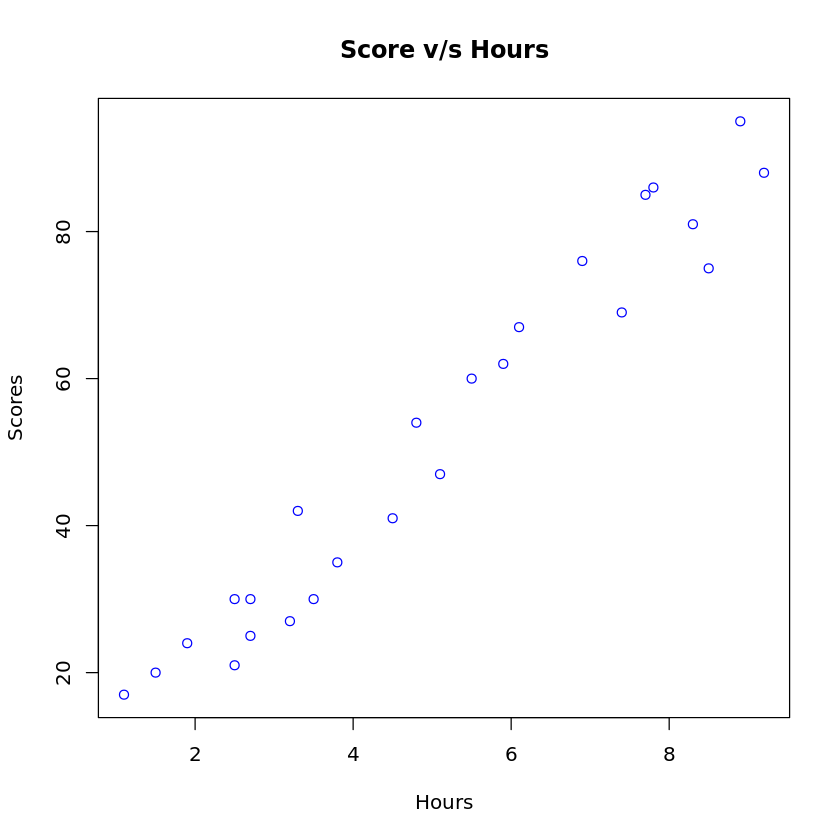

In [3]:
# Plotting the given data

plot(x = student_data$Hours, y = student_data$Scores, xlab = "Hours", ylab = "Scores", main = "Score v/s Hours", col = "blue")

# Step-3 Running Linear Regression on the data as there are only Two variables.

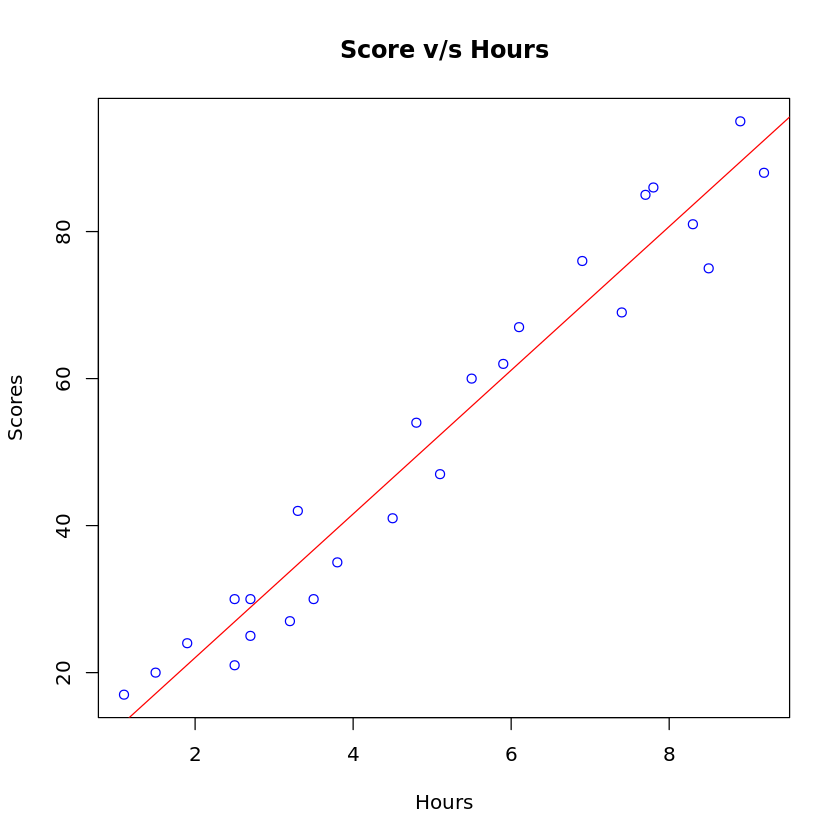

In [4]:
# Linear regression
student_data_regression <- lm(formula = Scores~Hours, data = student_data)
plot(x = student_data$Hours, y = student_data$Scores, xlab = "Hours", ylab = "Scores", main = "Score v/s Hours", col = "blue")
abline(student_data_regression, col= "Red")

In [5]:
summary(student_data_regression)


Call:
lm(formula = Scores ~ Hours, data = student_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.578  -5.340   1.839   4.593   7.265 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4837     2.5317   0.981    0.337    
Hours         9.7758     0.4529  21.583   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.603 on 23 degrees of freedom
Multiple R-squared:  0.9529,	Adjusted R-squared:  0.9509 
F-statistic: 465.8 on 1 and 23 DF,  p-value: < 2.2e-16


# Step-4 Splitting Data into Test and Training Data

In [6]:
# Splitting Data Into Test and Training data
install.packages("caTools")
library(caTools) # package "caTools" is used for splitting the data

split = sample.split(Y = student_data$Scores, SplitRatio = 0.75)
training_set = subset(student_data, split == TRUE)
test_set = subset(student_data, split==FALSE)

training_set # checking the training data

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



,Hours,Scores
,<dbl>,<int>
1,2.5,21
2,5.1,47
3,3.2,27
4,8.5,75
5,3.5,30
6,1.5,20
8,5.5,60
9,8.3,81
12,5.9,62


In [7]:
test_set# checking the test data

,Hours,Scores
,<dbl>,<int>
7,9.2,88
10,2.7,25
11,7.7,85
13,4.5,41
14,3.3,42
15,1.1,17
20,7.4,69


# Step-5 Training the dataset

In [8]:
# training 
result <- lm(formula = Scores~Hours, data = training_set)
summary(result)


Call:
lm(formula = Scores ~ Hours, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.669  -5.058   2.611   4.173   6.376 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.1290     3.0777   0.367    0.719    
Hours        10.0635     0.5605  17.954 5.02e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.568 on 16 degrees of freedom
Multiple R-squared:  0.9527,	Adjusted R-squared:  0.9498 
F-statistic: 322.3 on 1 and 16 DF,  p-value: 5.017e-12


In [9]:
result$coefficients

(Intercept)       Hours 
   1.129037   10.063505

# Step-6 Using the Test Data to predict the outcome

In [10]:
pred <- predict(result, test_set)
head(pred) #printing the predicted result

7       10       11       13       14       15 
93.71328 28.30050 78.61802 46.41481 34.33860 12.19889

In [11]:
head(test_set) # printing the head of test set to compare with predicted values

,Hours,Scores
,<dbl>,<int>
7,9.2,88
10,2.7,25
11,7.7,85
13,4.5,41
14,3.3,42
15,1.1,17


# Step-7 What will be predicted score if a student studies for 9.25 hrs/ day?

In [15]:
predicted_result <- predict(result, data.frame(Hours = 9.25))
predicted_result

1 
94.21646

So, the score of student will be 94.21645.